<a href="https://colab.research.google.com/github/ykitaguchi77/Laboratory_course/blob/master/6.%20Python%E3%82%92%E7%94%A8%E3%81%84%E3%81%9FLinear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**6. Linear Regression using sklearn**

In [1]:
import numpy as np
!pip install scikit-learn==1.1.0 #scikit-learn 1.2以降ではBoston datasetが削除されているため
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

#Bostonの住宅価格データ
標本数506、よく練習に使われるデータ

In [ ]:
boston = load_boston()
np.random.seed(1234)

In [ ]:
boston

In [3]:
import pandas as pd

#説明変数
X_array = boston.data
#目的変数
y_array = boston.target
df = pd.DataFrame(X_array, columns = boston.feature_names).assign(MEDV=np.array(y_array))

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [4]:
# 説明変数：13項目のうち1つだけ使う
x = boston.data[:, 5]
# 目的変数：住宅価格のデータを使う
y = boston.target

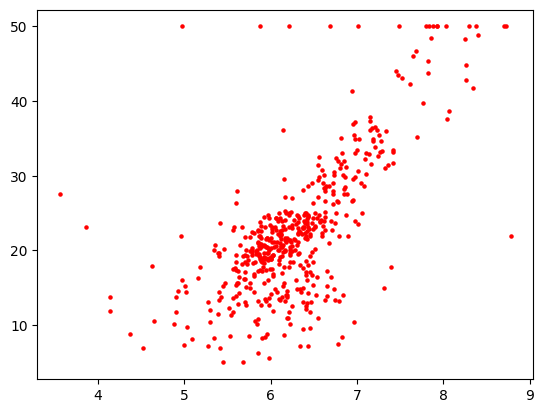

In [8]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=5, c="red")

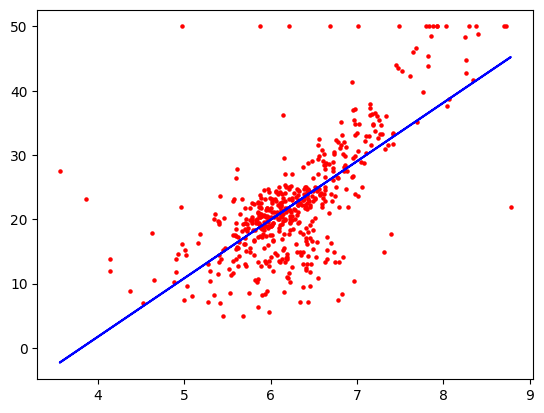

In [9]:
# prompt: scikit learnで線形に近似。scatterplotと同時に表示


# scikit-learnで線形に近似
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))
# 散布図と線形回帰の線を表示
plt.scatter(x, y, s=5, c="red")
plt.plot(x, y_pred, c="blue")
plt.show()




```
# これはコードとして書式設定されます
```

#最急降下法を行う
Cost: J = (sum((θ×X - y)^2)/2m <br>
Cost function: J(θ) =1/2m * Σ(hθ(x(i)^-y(i)))^2 <br>

最急降下法：(Cost function J(θ)の微分を減算する）<br>
θj = θj - α * 1/m * Σ((h(x(i)-y(i))*Xj(i) )

In [ ]:
# w0の項を追加するためにxに小細工をする
X = np.array([[1, v] for v in x])
# ランダムな値をw0, w1の初期値に設定する
theta = np.random.random(len(X[0]))
# ちょっと変えるための度合いを決める
alpha = 0.01
# ------wをちょっとずつ変えていくループを実行------
# ループ回数100回、1000回、10000回、100000回でwを保存する
theta_100 = []
theta_1000 = []
theta_10000 = []
for i in range(100000):
    # 予測値y_predを計算する。
    y_pred = np.dot(X, theta)  # 式２－１
    # 損失関数の微分を計算する
    dw = np.dot((y - y_pred), X) / len(X)  # 式２－５
    # wをちょっとだけ動かす
    # print(i, 'w =', w)
    theta += alpha * dw  # 式２－６
    if i == 100-1:
        # listはnp.copyしないとコピー元と同期してしまうので注意！
        theta_100 = np.copy(theta)
    elif i == 1000-1:
        theta_1000 = np.copy(theta)
    elif i == 10000-1:
        theta_10000 = np.copy(theta)
    elif i == 100000-1:
        theta_100000 = np.copy(theta)

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)

# ----------------計算式の結果-------------------
plt.plot(x, np.dot(X, theta_100), label='org_100')
plt.plot(x, np.dot(X, theta_1000), label='org_1000')
plt.plot(x, np.dot(X, theta_10000), label='org_10000')
plt.plot(x, np.dot(X, theta_100000), c='black', linewidth=1.0, label='org_100000')


plt.legend()
plt.show()

In [ ]:
# ######### sklearnのツールLinearRegressionを使って回帰 ###########
# ものすごく簡単...
lr = LinearRegression(fit_intercept=True)
lr.fit(X, y)
pred = lr.predict(X)

In [ ]:
# ----------------散布図を作成-------------------
plt.scatter(x, y, s=1)
# ---------------sklearnの結果------------------
plt.plot(x, pred, c='y', linestyle='dashdot', label='sklearn')
